# Example of how to use the semantic similarity method

A common way to determine if there is similarity between one body of text and another is to convert the text into vector space, and compute the cosine similarity between the two vectors.
  
This approach involves extracting the words (a bag-of-words approach), and constructing a vector with each word as a dimention for the vector. The vector is normalized using the term-frequency inverse term frequency approach (to standardize the quantity of times a word might occur). 

![diagram](http://blog.christianperone.com/wp-content/uploads/2013/09/cosinesimilarityfq1.png)
> *(Source of image: Christian S. Perone, blog: http://blog.christianperone.com/2013/09/machine-learning-cosine-similarity-for-vector-space-models-part-iii/)*

The similarity of the resultant vectors can be compared using their cosine (hence degree): 
 - if angle is small, then the two are very close;
 - if the angle is radically different, it will reveal that the cosine similarity is much smaller than 1

------------------

The below example demonstrates how this can be done using **`nlpru.Semantics.Get_similarity()`** method:
* first we connect to and extract data from a data warehouse of concatenated tweets from 2 separate communities; 
* visualize the data
* compute sentiment similarity and plot the response

In [21]:
from nlpru import Semantics
from pysqlc import DB
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
# style.use('fivethirtyeight')

db = DB(database='kremlin_protests_dw')

In [47]:
q = """
SELECT 
    id,
    day_and_hour,
    comm_0_text,
    comm_1_text
FROM kremlin_protests_dw.similarity_communities_0and1_mar26_rest
LIMIT 24
"""
data = db.query(q)
df = pd.DataFrame(data, columns=['id','day_and_hour','comm_0_text','comm_1_text'])

In [48]:
df.head()

,id,day_and_hour,comm_0_text,comm_1_text
0,1,2017-03-26 00:00:00,https://t.co/sfcR8Cidlp Навальный работает на ...,Валентин Ведюков / / Алексей Навальный стоит...
1,2,2017-03-26 01:00:00,"Мне понравилось видео ""Реакция Медведева на ра...",В чем проблема показать доход в виде грантов? ...
2,3,2017-03-26 10:00:00,"@b_pilatus а где собаки, перечный газ и водомё...",@VictorKvert2008 к параду коррупции готовы Г...
3,4,2017-03-26 11:00:00,@mkomsomolets ДимонОтветит. Митинги 26 марта п...,Пока мусоров и чекистов не начнут истеблять пр...
4,5,2017-03-26 12:00:00,Полиция в Москве задержала Алексея Навального ...,"Сочи, комсомольский сквер, полиция говорит, чт..."


In [49]:
S = Semantics()

In [50]:
result = []
for row in data:
    sim = S.Get_similarity(
        docs_list = [row[2],row[3]],
        use_normal_form=False,
        clean_documents=True
    ).tolist()
    result.append((row[1],sim[0][1]))

In [51]:
df_sim = pd.DataFrame(result, columns=['datetime','cosine similarity'])
df_sim.set_index('datetime', inplace=True)
df_sim.head()

,cosine similarity
datetime,
2017-03-26 00:00:00,0.168211
2017-03-26 01:00:00,0.119728
2017-03-26 10:00:00,0.842527
2017-03-26 11:00:00,0.875586
2017-03-26 12:00:00,0.875147


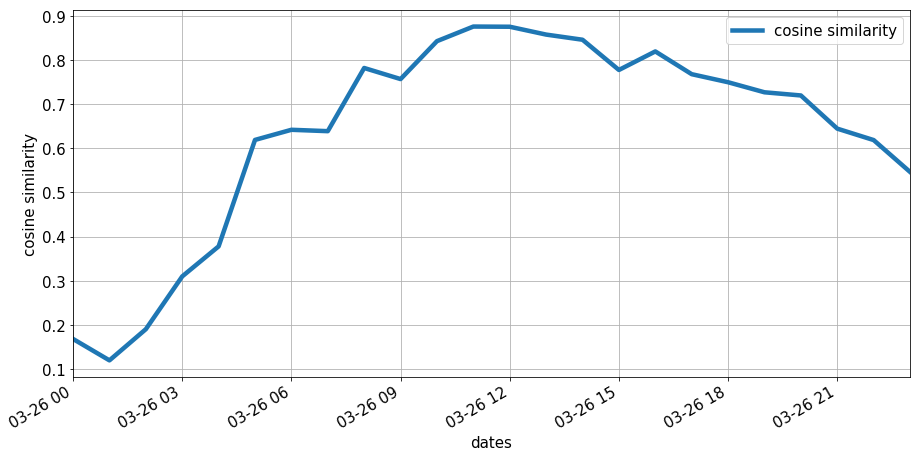

In [52]:
chart_size = 15 
df_sim.plot(linewidth=0.3*chart_size,
         figsize=(chart_size, chart_size/2),
        )
plt.grid(True)
# plt.title("Daily", color='black')
plt.xlabel("dates", fontsize=chart_size)
plt.ylabel("cosine similarity", fontsize=chart_size)
plt.legend(prop={'size':chart_size})
plt.tick_params(axis='both', which='major', labelsize=chart_size)